In [1]:
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from collections import Counter

sns.set_theme()

In [2]:
with open('../data/annotated/result.json', 'r') as file:
    data = json.load(file)

cat_map = {cat['id']: cat['name'] for cat in data['categories']}

In [7]:
len(data['images'])

192

# Data distribution

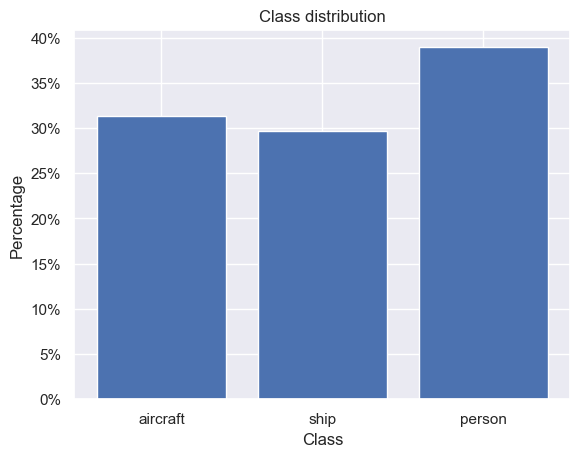

In [8]:
annot_counter = Counter(list(map(lambda x: cat_map[x['category_id']], data['annotations'])))

x_ticks = [0, 1, 2]
x_labels = list(annot_counter.keys())
y = np.array(list(annot_counter.values()))
y = y/y.sum()
plt.bar(x_ticks, y*100)
plt.xticks(x_ticks, x_labels)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class distribution')
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}%"))
plt.savefig('../assets/data_dist.png')